In [1]:
import numpy
import pandas
import warnings
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
data = pandas.read_csv('../../datasets/database.csv')
data = data.rename({'default payment next month': 'TARGET'}, axis=1) # renomeando coluna para facilitar

data['SEX'] = pandas.Categorical(data['SEX'])
sex_dummies = pandas.get_dummies(data['SEX'], prefix = 'sex')

data['MARRIAGE'] = pandas.Categorical(data['MARRIAGE'])
mar_dummies = pandas.get_dummies(data['MARRIAGE'], prefix = 'marr')

data = pandas.concat([data, sex_dummies, mar_dummies], axis=1)
data.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET,sex_0,sex_1,marr_1,marr_2,marr_3
0,50000.0,1,2,1,57,-1,0,-1,0,0,...,10000.0,9000.0,689.0,679.0,0,0,1,1,0,0
1,320000.0,1,1,1,49,0,0,0,-1,-1,...,75940.0,20000.0,195599.0,50000.0,0,0,1,1,0,0
2,500000.0,1,1,1,58,-2,-2,-2,-2,-2,...,3180.0,0.0,5293.0,768.0,0,0,1,1,0,0
3,280000.0,1,2,1,40,0,0,0,0,0,...,6300.0,6400.0,6400.0,6737.0,0,0,1,1,0,0
4,70000.0,1,2,1,39,0,0,0,0,0,...,1000.0,2000.0,3000.0,0.0,0,0,1,1,0,0


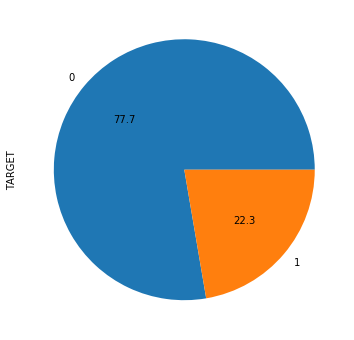

In [5]:
data.groupby('TARGET')['TARGET'].count().plot.pie(autopct='%.1f')

In [6]:
X = data.loc[:, ~data.columns.isin(['TARGET', 'SEX', 'MARRIAGE'])].values
y = data.loc[:, data.columns.isin(['TARGET'])].values

print(X.shape)
print(y.shape)

(29601, 26)
(29601, 1)


In [7]:
X_norm = normalize(X, norm='l2')

under_sampler = RandomUnderSampler(random_state=42)
X_rus, y_rus = under_sampler.fit_sample(X_norm, y)

print(X_rus.shape)
print(y_rus.shape)

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.33, random_state=42)

(13210, 26)
(13210, 1)


In [8]:
y_all = numpy.concatenate([y_train, y_test]).ravel()
unique, counts = numpy.unique(y_all, return_counts=True)
dict(zip(unique, counts))

{0: 6605, 1: 6605}

In [39]:
classifier = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [40]:
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      2191
           1       0.73      0.65      0.69      2169

    accuracy                           0.71      4360
   macro avg       0.71      0.71      0.71      4360
weighted avg       0.71      0.71      0.71      4360



In [42]:
print(confusion_matrix(y_test, y_pred))

[[1661  530]
 [ 752 1417]]
